In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [3]:
files = files.upload()

Saving student_habits_performance.csv to student_habits_performance.csv


In [4]:
df1=pd.read_csv('student_habits_performance.csv')

# This EDA is performed for predicting exam scores of student ,using data of their habits,background and enviroment. we will looking into data, perform data cleaning and then start with data analysis part.

## **1st step-> Having a look at data, see for columns etc.**

In [5]:
df1.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [7]:
df1.nunique()

,0
student_id,1000
age,8
gender,3
study_hours_per_day,78
social_media_hours,60
netflix_hours,51
part_time_job,2
attendance_percentage,320
sleep_hours,68
diet_quality,3


In [8]:
df1.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [9]:
df1.head(5)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


# 2nd step-> Identify Target Variable.**bold text**

This is synthetic dataset mimicing real life students.
Our objective is to find what can be the score of student.
So, the target variable in this case exam score.

# 3rd step-> Identify Duplicates and remove them.**bold text**

In [10]:
df1.duplicated().sum()

np.int64(0)

In [11]:
df1.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
995,False
996,False
997,False
998,False


As you can there are no duplicate row in database.

# 4th step-> Identify columns which are not required for analysisi and remove them.

In [24]:
df2=df1.drop(['student_id'], axis=1)
df2.head()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


So student_id does not matter for grades so we dropped it for convince.

# 5th step-> Check for outliers.

<Axes: >

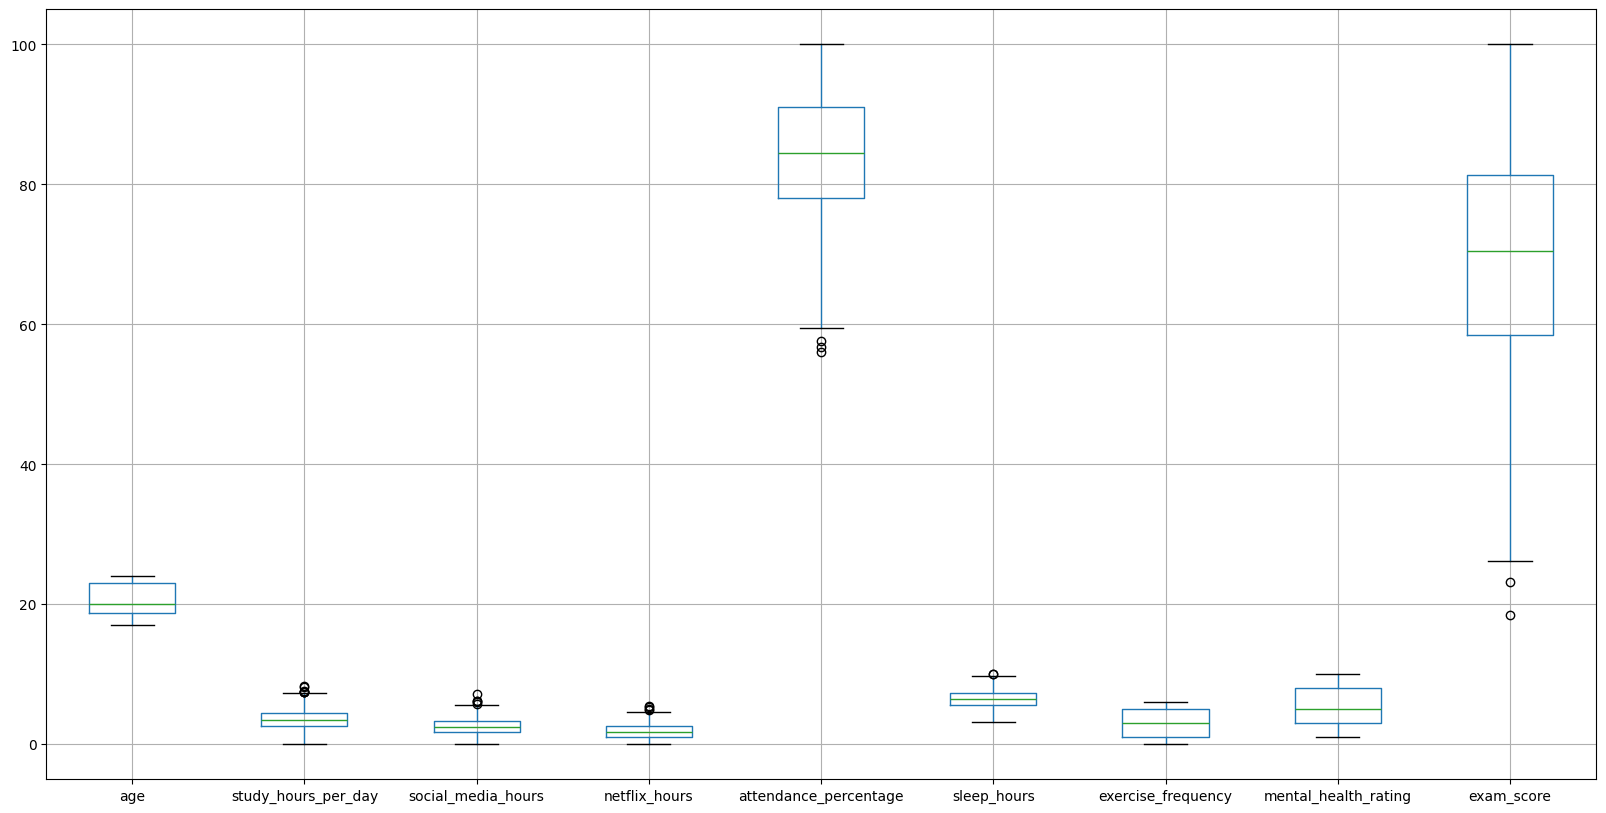

In [13]:
df2.boxplot(figsize=(20,10))

<Axes: >

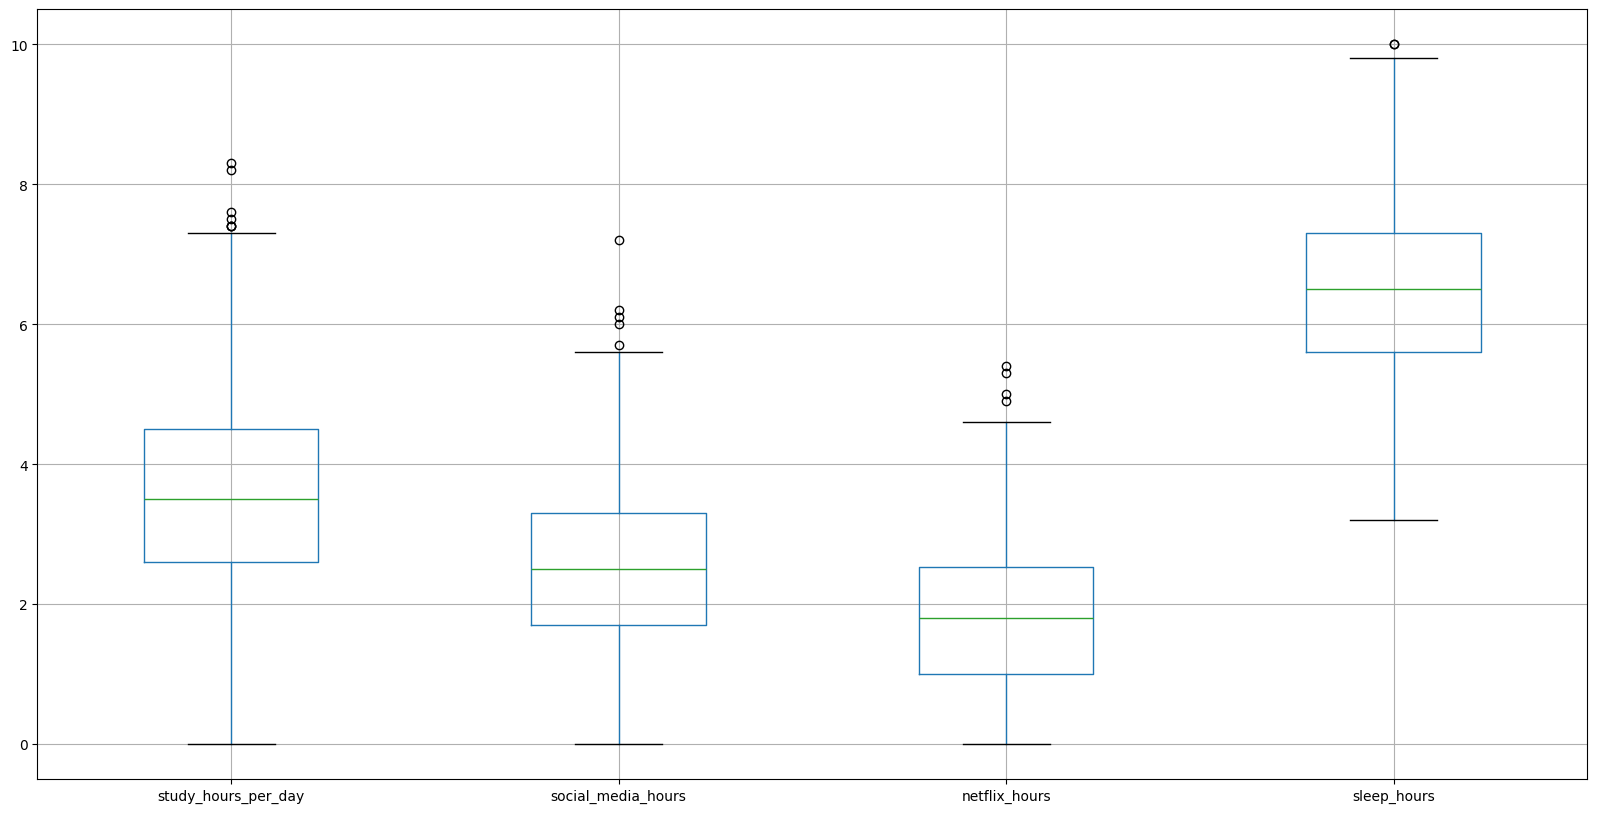

In [14]:
df2.boxplot(['study_hours_per_day',
       'social_media_hours', 'netflix_hours','sleep_hours'],figsize=(20,10))

This is pretty much realistic data and the outlier are acceptable becuse they are geniune and their presence doesnt affect anything.

# 7th step-> Do Univariate,Bivariate,Multvariate analysis.

# 7th step-> Do Univariate,Bivariate,Multvariate analysis.

# i) Univariate Analysis

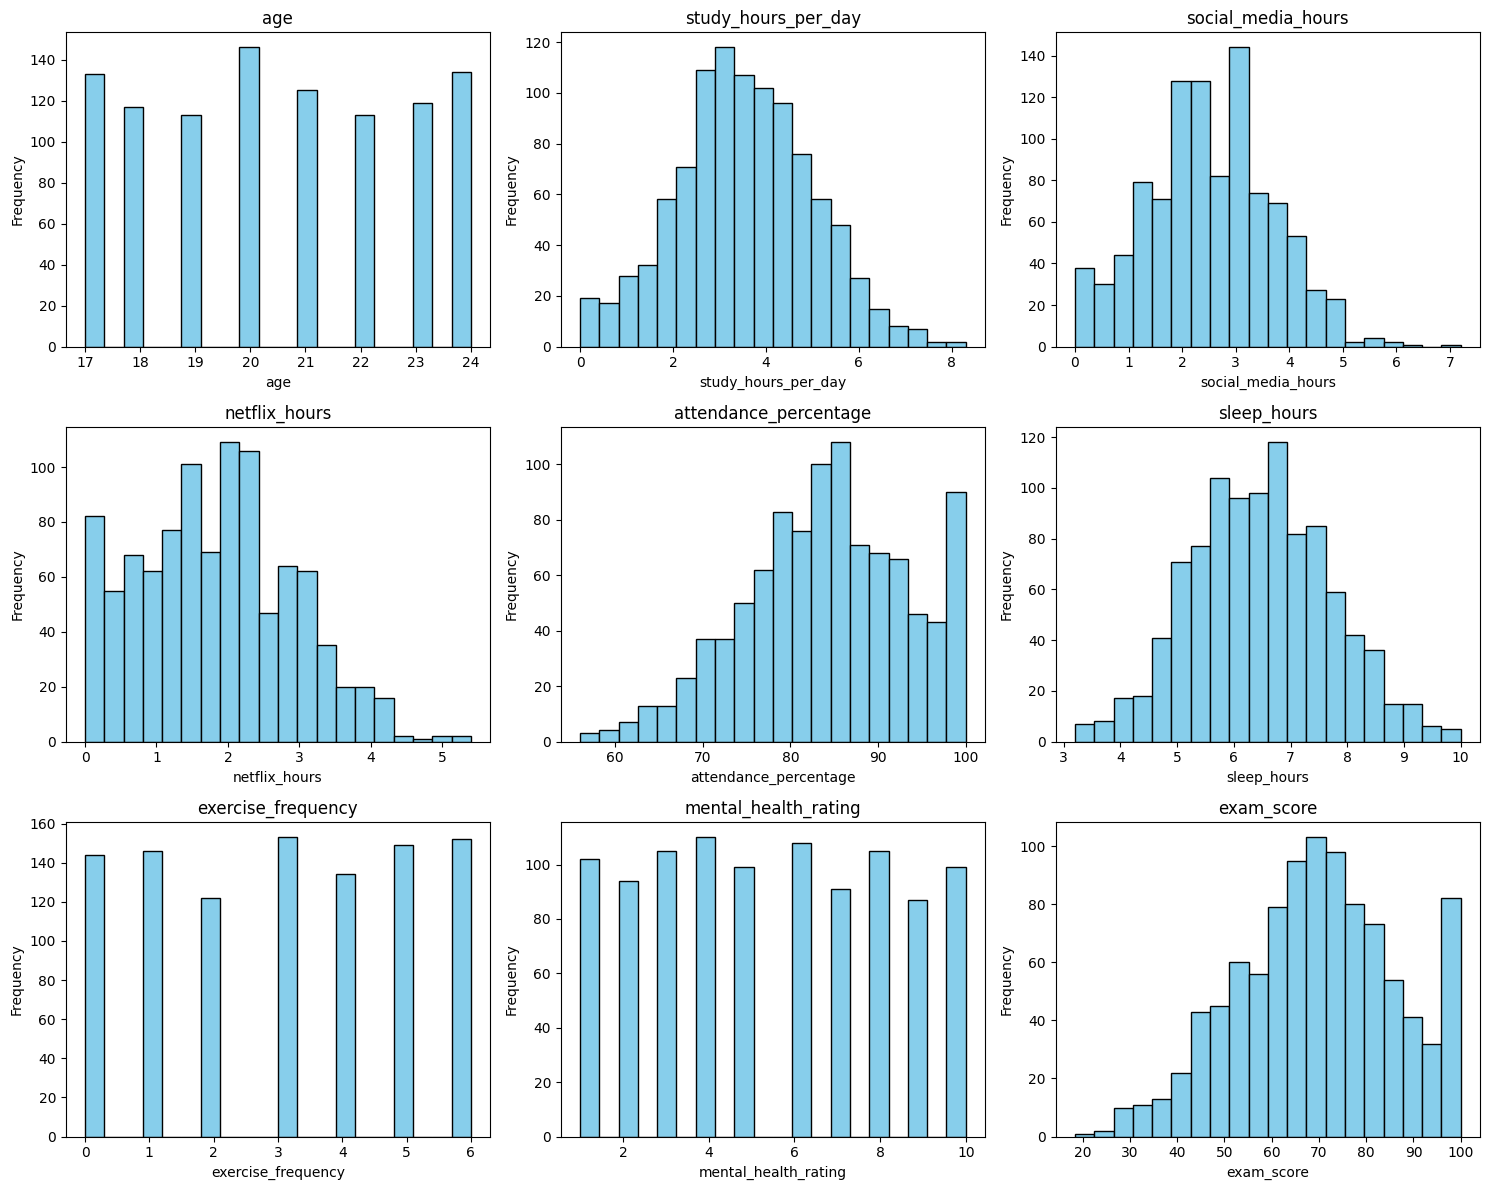

In [15]:
num_cols = ['age','study_hours_per_day','social_media_hours','netflix_hours',
            'attendance_percentage','sleep_hours','exercise_frequency',
            'mental_health_rating','exam_score']
plt.figure(figsize=(15,12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)   # 3 rows, 3 cols layout
    plt.hist(df2[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


As we can see ,here what is usual time spent by student and what is their stats.

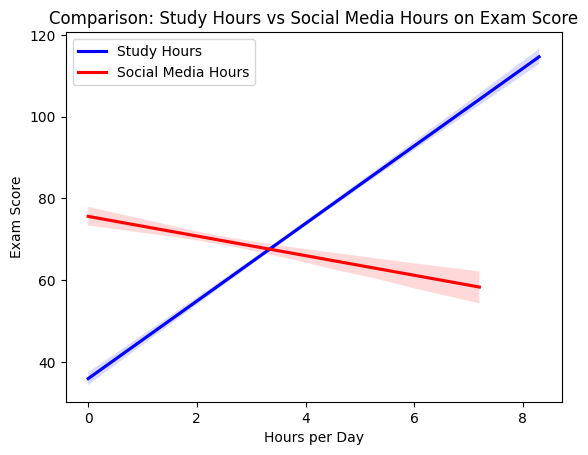

In [16]:

sns.regplot(x='study_hours_per_day', y='exam_score', data=df1,
            scatter=False, color='blue', label='Study Hours')

sns.regplot(x='social_media_hours', y='exam_score', data=df1,
            scatter=False, color='red', label='Social Media Hours')

plt.legend()
plt.title("Comparison: Study Hours vs Social Media Hours on Exam Score")
plt.xlabel("Hours per Day")
plt.ylabel("Exam Score")
plt.show()



Comparison of Study Hours and Social Media Hours with Exam Scores (Regression Plot)

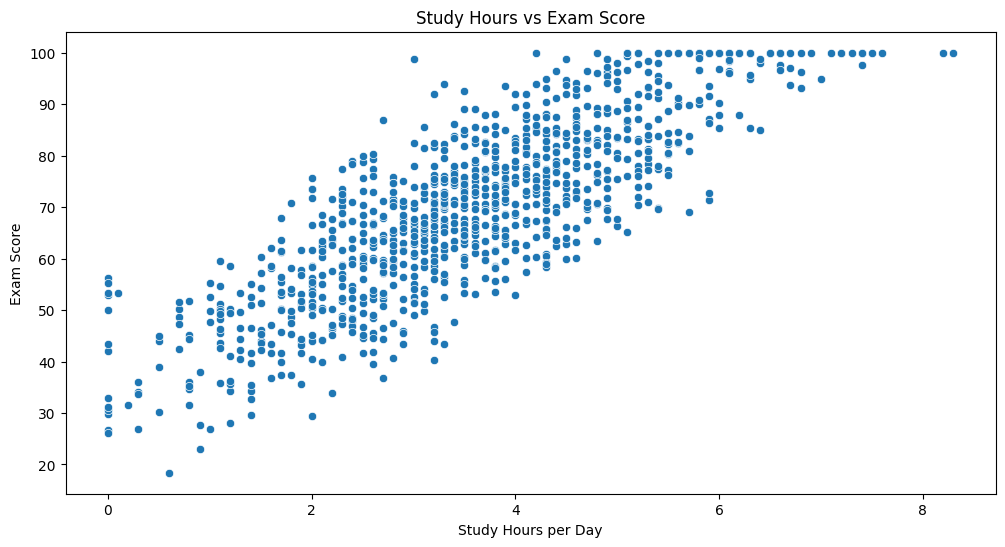

In [17]:
# Study Hours vs Exam Score
plt.figure(figsize=(12, 6))
sns.scatterplot(x='study_hours_per_day', y='exam_score', data=df2)
plt.title('Study Hours vs Exam Score')
plt.xlabel('Study Hours per Day')
plt.ylabel('Exam Score')
plt.show()

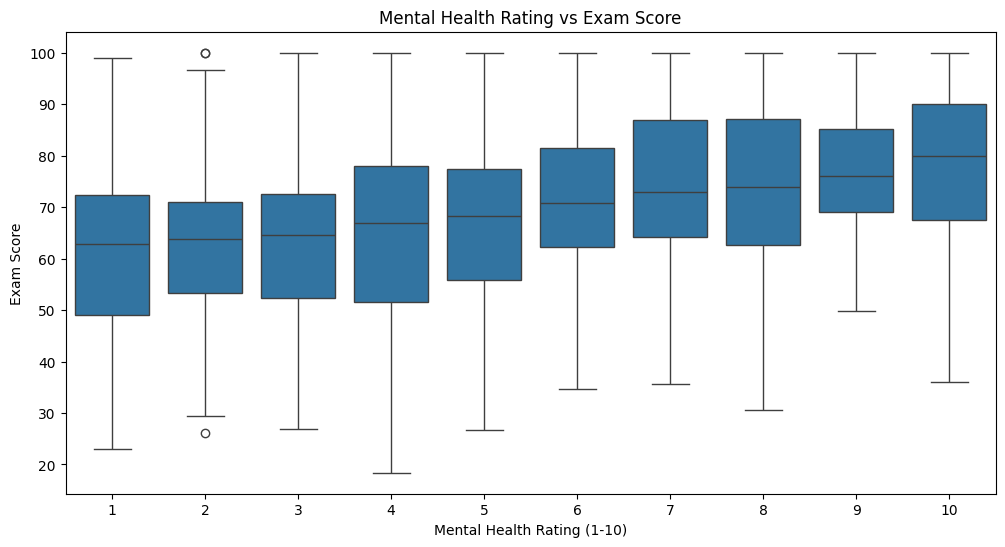

In [18]:
# Mental Health Rating vs Exam Score
plt.figure(figsize=(12, 6))
sns.boxplot(x='mental_health_rating', y='exam_score', data=df2)
plt.title('Mental Health Rating vs Exam Score')
plt.xlabel('Mental Health Rating (1-10)')
plt.ylabel('Exam Score')
plt.show()

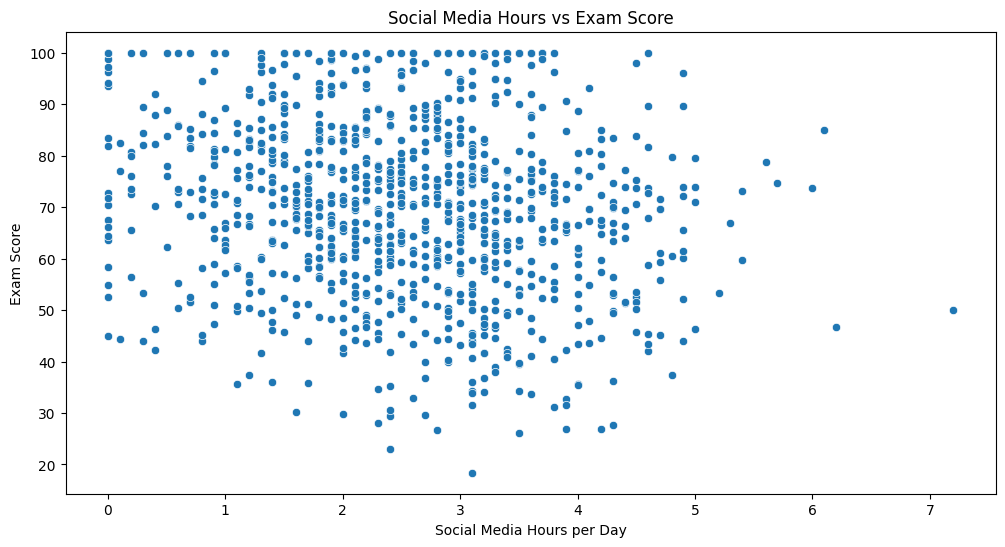

In [19]:
# Social Media Hours vs Exam Score
plt.figure(figsize=(12, 6))
sns.scatterplot(x='social_media_hours', y='exam_score', data=df2)
plt.title('Social Media Hours vs Exam Score')
plt.xlabel('Social Media Hours per Day')
plt.ylabel('Exam Score')
plt.show()

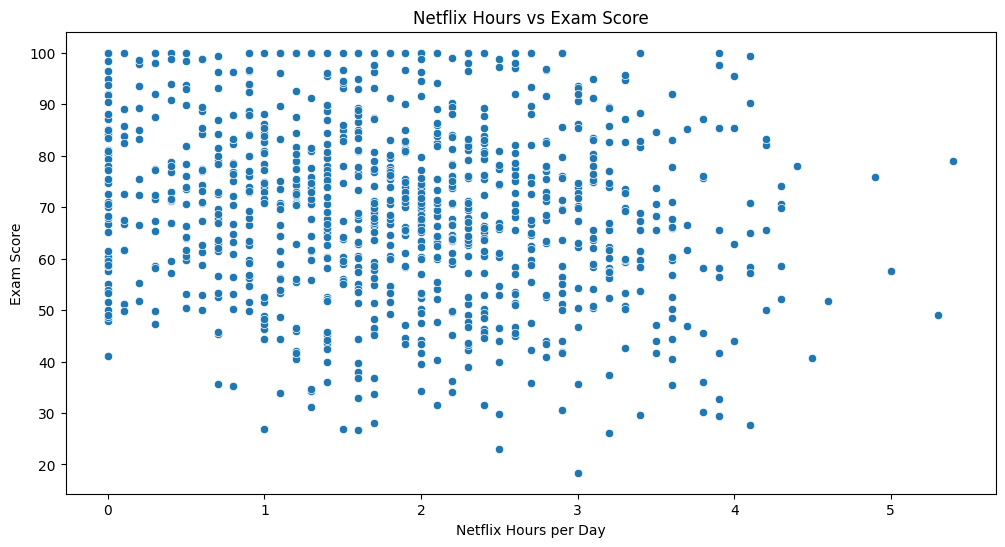

In [20]:
# Netflix Hours vs Exam Score
plt.figure(figsize=(12, 6))
sns.scatterplot(x='netflix_hours', y='exam_score', data=df2)
plt.title('Netflix Hours vs Exam Score')
plt.xlabel('Netflix Hours per Day')
plt.ylabel('Exam Score')
plt.show()

In [21]:

numerical_df = df2.select_dtypes(include=np.number)

numerical_df.corr()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
age,1.000000,0.003971,-0.009151,-0.001174,-0.026055,0.037482,-0.003836,-0.045101,-0.008907
study_hours_per_day,0.003971,1.000000,0.020282,-0.031158,0.026264,-0.027757,-0.028701,-0.003768,0.825419
social_media_hours,-0.009151,0.020282,1.000000,0.011477,0.040479,0.018236,-0.037319,0.001496,-0.166733
netflix_hours,-0.001174,-0.031158,0.011477,1.000000,-0.002092,-0.000935,-0.006448,0.008034,-0.171779
attendance_percentage,-0.026055,0.026264,0.040479,-0.002092,1.000000,0.013756,-0.007857,-0.018745,0.089836
sleep_hours,0.037482,-0.027757,0.018236,-0.000935,0.013756,1.000000,0.019769,-0.006508,0.121683
exercise_frequency,-0.003836,-0.028701,-0.037319,-0.006448,-0.007857,0.019769,1.000000,-0.000242,0.160107
mental_health_rating,-0.045101,-0.003768,0.001496,0.008034,-0.018745,-0.006508,-0.000242,1.000000,0.321523
exam_score,-0.008907,0.825419,-0.166733,-0.171779,0.089836,0.121683,0.160107,0.321523,1.000000


As you can see mental health, internet quality, excercise frequency are not affecting exam score, but is is suppose to affect it.We must jugde correlation accurately.We should standardize rating vs scale (Features like mental_health_rating (1–10), exercise_frequency (numeric), and internet_quality (categorical: Poor/Fair/Good))   vs Exam score.

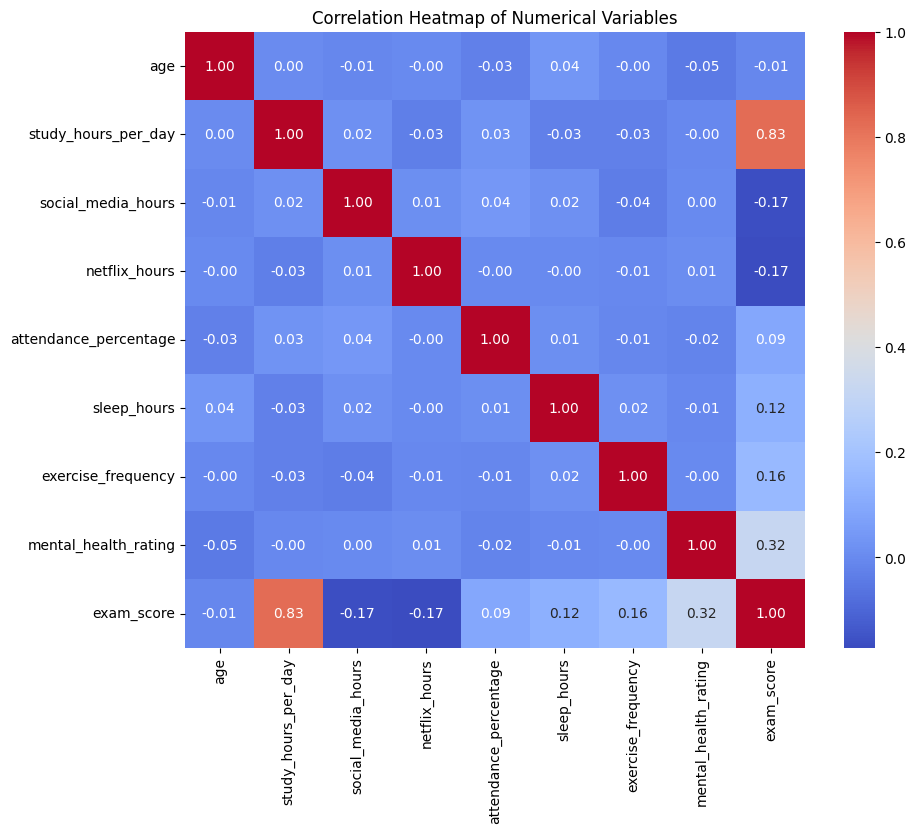

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

# 8th step-> Perform Linear regression for dataset

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score


Encoding categorical variable.

In [26]:
label_cols = ["gender", "diet_quality", "parental_education_level",
              "internet_quality", "extracurricular_participation", "part_time_job"]

encoder = LabelEncoder()
for col in label_cols:
    df2[col] = encoder.fit_transform(df2[col])


In [35]:
from sklearn.preprocessing import LabelEncoder

encoders = {}
label_cols = ["gender", "diet_quality", "parental_education_level",
              "internet_quality", "extracurricular_participation", "part_time_job"]

for col in label_cols:
    le = LabelEncoder()
    df2[col] = le.fit_transform(df2[col])
    encoders[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Display all encodings
for col, mapping in encoders.items():
    print(f"{col} encoding: {mapping}")


gender encoding: {np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2)}
diet_quality encoding: {np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2)}
parental_education_level encoding: {np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2), np.int64(3): np.int64(3)}
internet_quality encoding: {np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2)}
extracurricular_participation encoding: {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}
part_time_job encoding: {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}


In [36]:
X = df2.drop("exam_score", axis=1)
y = df2["exam_score"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [40]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Standard scaling

In [41]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [42]:
y_pred = model.predict(X_test_scaled)

In [43]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 26.413468545192295
R² Score: 0.8969950409013169


In [47]:
# Define the list of feature names in the order used by the model
feature_names = X.columns.tolist()

# Prompt user for inputs
sample_student = []
for feature in feature_names:
    value = input(f"Enter value for {feature}: ")
    sample_student.append(float(value))

# Convert the list to a DataFrame with feature names
sample_student_df = pd.DataFrame([sample_student], columns=feature_names)

sample_student_scaled = scaler.transform(sample_student_df)
# Predict exam score
predicted_score = model.predict(sample_student_scaled)
print("Predicted Exam Score:", predicted_score[0])

Enter value for age: 19
Enter value for gender: 0
Enter value for study_hours_per_day: 7
Enter value for social_media_hours: 2
Enter value for netflix_hours: 1
Enter value for part_time_job: 0
Enter value for attendance_percentage: 85
Enter value for sleep_hours: 8
Enter value for diet_quality: 2
Enter value for exercise_frequency: 6
Enter value for parental_education_level: 2
Enter value for internet_quality: 0
Enter value for mental_health_rating: 7
Enter value for extracurricular_participation: 0
Predicted Exam Score: 114.88957022972907


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# 9th step-> Residual Errors

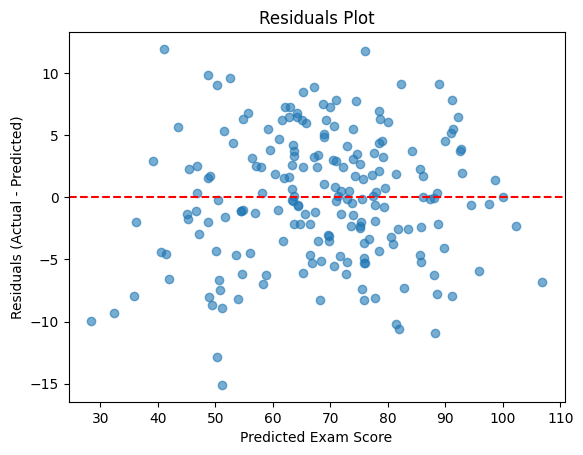

In [48]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Exam Score")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals Plot")
plt.show()